<a href="https://colab.research.google.com/github/srishtipithadia/ProjectsInMLandAI/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Homework 1: Logistic Regression Implementation**

*   By: Srishti Pithadia
*   Date: September 9th, 2022


---


In [115]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from math import exp
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import math
import warnings
warnings.filterwarnings("ignore")

**Task 1: Describe the Problem**

The problem I want to investigate is if a stroke can be predicted by sex, age, hypertension (high blood pressure), heart disease, relationship status, work type, residence type, glucose level, BMI (body mass index), and smoking status. I believe that this is a good problem to solve with logistic regression because whether some combination of these inputs causes a stroke or not is a yes/no answer. 

**Task 2: Pick the Dataset**

In [6]:
#link: https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset
df = pd.read_csv('full_data.csv')

a. Exploratory Data Analysis

In [7]:
# viewing the first few rows of the data
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
# seeing the size of the data
df.shape

(4981, 11)

In [9]:
# looking at the stats of the dataset's numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [10]:
# looking at stats of the dataset's categorical columns
df.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [11]:
# getting general info about the dataset's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [12]:
# checking to see if there are any missing vals in the dataset
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# seeing if the data imbalanced
df.stroke.value_counts(normalize=True) #normalizes the result

0    0.950211
1    0.049789
Name: stroke, dtype: float64

b. Visualizing the Data

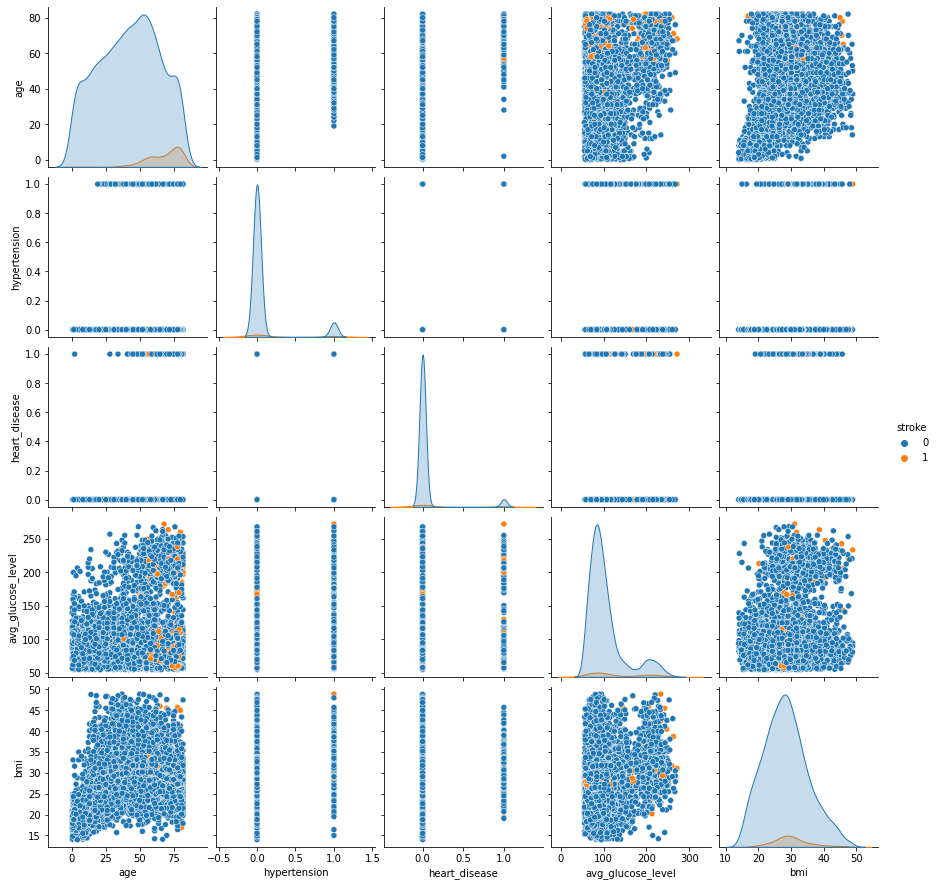

In [14]:
# plotting pairwise relationships in the dataset
sns.pairplot(df, hue='stroke')

Text(0.5, 1.0, 'work_type')

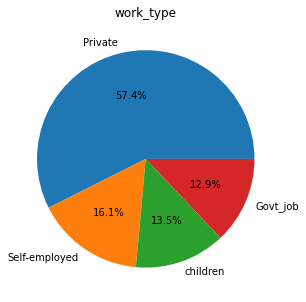

In [15]:
# depicting proportional data with each slice of pie representing a specific category
# going to do for both categorical columns with >2 options

# work type var
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.work_type.value_counts(), 
       labels=df.work_type.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('work_type')

Text(0.5, 1.0, 'smoking_status')

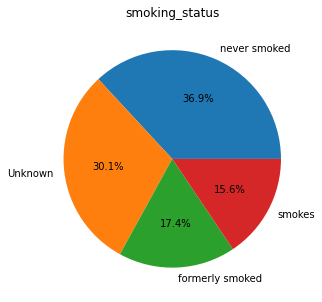

In [16]:
# smoking status var
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.smoking_status.value_counts(), 
       labels=df.smoking_status.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('smoking_status')

In [17]:
# splitting the dataset by stroke/not and getting the mean value of other numeric variables for each group 
df.groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,42.141348,0.087260,0.048172,104.569056,28.409698
1,67.819839,0.266129,0.189516,132.175565,30.186694


In [18]:
# splitting dataset by Pclass and getting the mean value of 'stroke' for each categorical group 
# (i.e. the probability of having a stroke in each Pclass group) 

# ever married var
df[['ever_married', 'stroke']].groupby(['ever_married'], as_index=False).mean().sort_values(by='stroke', ascending=False)

,ever_married,stroke
1,Yes,0.066768
0,No,0.017049


In [19]:
# work type var
df[['work_type', 'stroke']].groupby(['work_type'], as_index=False).mean().sort_values(by='stroke', ascending=False)

,work_type,stroke
2,Self-employed,0.080846
1,Private,0.051748
0,Govt_job,0.051242
3,children,0.002972


In [20]:
# residence type var
df[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index=False).mean().sort_values(by='stroke', ascending=False)

,Residence_type,stroke
1,Urban,0.053318
0,Rural,0.046141


In [21]:
# smoking status var
df[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index=False).mean().sort_values(by='stroke', ascending=False)

,smoking_status,stroke
1,formerly smoked,0.080738
3,smokes,0.054124
2,never smoked,0.048422
0,Unknown,0.031333


c. Feature Engineering & Encoding

In [22]:
# breaking down into age categories (by 10 years) for easier trend observation later
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, np.inf]
labels = [lbl for lbl in range(len(bins)-1)]
df['AgeCategory'] = pd.cut(df.age, bins=bins, labels=labels, right=True).astype(int)

In [23]:
# performing label encoding for all the 2 option categorical columns so that feature scaling can work

# ever married var
df.ever_married = df.ever_married.map({ 'No': 0, 'Yes': 1 })

# gender var
df.gender = df.gender.map({ 'Male': 0, 'Female': 1 })

# residence type var
df.Residence_type = df.Residence_type.map({ 'Rural': 0, 'Urban': 1 })

In [24]:
# performing hot encoding for categorical columns with >2 options
for column in ['work_type']:
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1).drop([column], axis=1)

In [25]:
# dropping columns that don't make sense 
# smoking has 'unknown' as an option, which isn't helpful
df.drop(['smoking_status'], axis=1, inplace=True)

d. Features Correlation

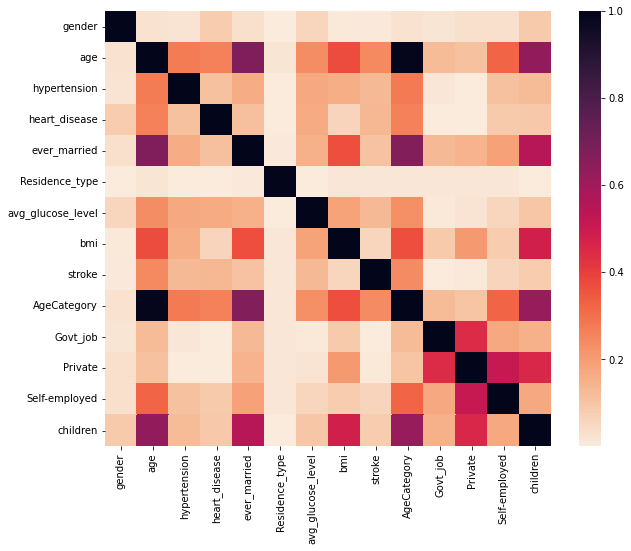

In [26]:
# seeing how our features correlate with each other
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [27]:
# seeing how our features correlate with each other and with the target variable ('stroke')
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
AgeCategory          0.242041
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
ever_married         0.108398
Self-employed        0.062643
bmi                  0.056926
Residence_type       0.016494
Private              0.010459
Govt_job             0.002574
gender              -0.008870
children            -0.085075
Name: stroke, dtype: float64

e. Partitioning the Data

In [28]:
X = df.drop(['stroke'], axis=1)   # independent variables
y = df.stroke                     # dependent/target variable

# dividing the data into 'train' and 'test' sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# reshaping so number of y-train columns match number of x-train rows
# need to do so that dot product (later) works
y_train = y_train.to_numpy().reshape(1, X_train.shape[0])
y_test = y_test.to_numpy().reshape(1, X_test.shape[0])

f. Feature Scaling

In [30]:
# scaling the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

**Task 3: Implement Logistic Regression**

In [31]:
# sigmoid function: 1/(1+e^(-a))
# 'a' represents: (wT * X) + b, with wT as the transpose weight vector, X as the dataset, and b as the bias

def sigmoid_func(a):
    return 1 / (1 + exp(-1*a))  

# need to vectorize sigmoid function to avoid scalar conversion error
get_A_vector = np.vectorize(sigmoid_func)

a. Version 1: Batch Gradient Descent

In [57]:
# implementation of 'batch gradient descent' logistic regression

def bgd_logistic_reg(X, Y):
    # initialize constants
    m = X.shape[0]
    learning_rate = 0.001

    # initialize vars to be updated
    bias = 0
    weight = np.zeros((m, 1))

    for epoch in range(300):
        # getting A-vector
        A = get_A_vector(np.dot(weight.T, X) + bias) 

        # getting cost
        cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

        # getting derivatives for update step
        d_weight = np.dot(X, (A-Y).T)/m
        d_bias= np.sum(A-Y)/m

        # update step
        bias = bias - learning_rate * d_bias
        weight = weight - learning_rate * d_weight
    
    return bias, weight

# had to use X_train.T everywhere to avoid error
bias_v1, weight_v1 = bgd_logistic_reg(X_train.T, y_train)

In [58]:
# resulting bias
print(bias_v1)

-1.4125976161125147


In [59]:
# resulting weight
print(weight_v1)

[[-0.01326358]
 [ 0.14043934]
 [ 0.00556702]
 [ 0.00242554]
 [-0.0041604 ]
 [-0.00927599]
 [-1.44306878]
 [-0.54931052]
 [ 0.02126059]
 [-0.00229049]
 [-0.01218516]
 [ 0.00209283]
 [-0.00948346]]


b. Version 2: Mini-Batch Gradient Descent

In [223]:
# helper function for implementation (which follows after)

# creates mini batches
def get_mbs(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini.T, Y_mini.T))

    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini.T, Y_mini.T))

    return mini_batches

In [224]:
# implementation of 'mini-batch gradient descent' logistic regression

def mbgd_logistic_reg(X, Y):
    # initialize constants
    learning_rate = 0.001
    epsilon = 1e-5

    # initialize vars to be updated
    bias = 0
    weight = np.zeros((X.shape[0], 1))

    for i in range(10):
        # getting mini batches
        mini_batches = get_mbs(X.T, Y.T, 300)

        for mini_batch in mini_batches:
            # initialize mini-batch related vars
            X_mini, Y_mini = mini_batch
            m = X_mini.shape[1]

            # getting A-vector
            A = get_A_vector(np.dot(weight.T, X_mini) + bias) 

            # getting cost
            cost = (-1/m) * np.sum(Y_mini * np.log(A + epsilon) + (1-Y_mini) * (np.log(1-A + epsilon)))

            # getting derivatives for update step
            d_weight = np.dot(X_mini, (A-Y_mini).T)/m
            d_bias = np.sum(A-Y_mini)/m

            # update step
            bias = bias - learning_rate * d_bias
            weight = weight - learning_rate * d_weight
    
    return bias, weight

# had to use X_train.T everywhere to avoid error
bias_v2, weight_v2 = mbgd_logistic_reg(X_train.T, y_train)

In [37]:
# resulting bias
print(bias_v2)

-0.06498235882682693


In [38]:
#resulting weight
print(weight_v2)

[[-4.17226422e-04]
 [-2.78940133e-02]
 [-4.31763242e-05]
 [-2.61970405e-05]
 [-4.37288678e-04]
 [-3.51288662e-04]
 [-6.47480245e-02]
 [-1.98388432e-02]
 [-2.48521102e-03]
 [-9.20142378e-05]
 [-4.04288341e-04]
 [-9.81617379e-05]
 [-1.09883183e-04]]


c. Accuracy

In [60]:
# function to calculate accuracy
def accuracy(X, y, weight, bias):
    A = np.array((get_A_vector(np.dot(weight.T, X) + bias)) > 0.5 , dtype = "int64")
    print((1 - np.sum(np.absolute(A-y))/y.shape[1])*100)

In [61]:
# batch gradient descent accuracy
accuracy(X_test.T, y_test, weight_v1, bias_v1)

94.58375125376128


In [62]:
# mini-batch gradient descent accuracy
accuracy(X_test.T, y_test, weight_v2, bias_v2)

94.58375125376128


I am surprised that 94.58% was the accuracy for both types of gradient descent. I thought Batch GD was known for being more accurate than the Mini-Batch GD. I think that this happened because these ran for many iterations though. Neither was significantly faster than the other though.

**Task 4: Implement Optimization Algorithms**

a. Version 1: Momentum

In [225]:
# implementation of the Momentum optimization algorithm

def momentum_optimized (X, Y):
    # initialize constants
    m = X.shape[0] 
    n = X.shape[1]
    learning_rate = 0.001 
    epsilon = 1e-5
    gamma = 0.9

    # initialize vars to be updated
    bias = 0
    weight = np.zeros((m, 1)) 
    count = 0 
    prev_bias = 0
    prev_weight = 0
    
    for epoch in range(3):
        count += 1
        eda = np.full((m,1), 0) 

        for i in range(n):
            # getting individual row/column
            X_temp = X[ : , i].reshape(m, 1)
            Y_temp = Y[:, i].reshape(1,1)

            # getting A-vector
            A = get_A_vector(np.dot(weight.T, X_temp) + bias) 

            # getting cost
            cost = (-1/m) * np.sum(Y_temp * np.log(A) + (1-Y_temp) * (np.log(1-A)))

            # getting derivatives for update step
            d_weight = np.dot(X_temp, (A-Y_temp).T)/m
            d_bias = np.sum(A-Y_temp)/m

            # update step
            bias = bias - (learning_rate * d_bias + gamma * prev_bias)
            weight = weight - (learning_rate * d_weight + gamma * prev_weight)

            # update prev values
            prev_bias = learning_rate * d_bias + gamma * prev_bias
            prev_weight = learning_rate * d_weight + gamma * prev_bias
    
    return bias, weight

bias_v3, weight_v3 = momentum_optimized(X_train.T, y_train)

In [226]:
accuracy(X_test.T, y_test, weight_v3, bias_v3)

94.58375125376128


I thought that since I am optimizing the accuracy would be higher or it would run faster, but it actually seemed to be slightly slower. The accuracy didn't improve either, it just matched. I think this is because maybe the un-optimized accuracies were already pretty high. Also, the previous iteration's data didn't seem to improve things maybe because there's a very clear correlation in the data, with only a few outliers (~5%). Additionally Momentum optimizes if the SGD gets stuck in ravines, so maybe there wasn't many outliers in the data.

b. Version 2: RMSProp

In [220]:
# implementation of the RMSProp optimization algorithm

def rmsprop_optimized (X, Y):
    # initialize constants
    m = X.shape[0] 
    n = X.shape[1]
    learning_rate = 0.001 
    epsilon = 1e-5
    gamma = 0.9

    # initialize vars to be updated
    bias = 0
    weight = np.zeros((m, 1)) 
    count = 0 
    
    for epoch in range(10):
        count+=1
        eda = np.full((m,1), 0) 

        for i in range(n):
            # getting individual row/column
            X_temp = X[ : , i].reshape(m, 1)
            Y_temp = Y[:, i].reshape(1,1)

            # getting A-vector
            A = get_A_vector(np.dot(weight.T, X_temp) + bias) 

            # getting cost
            c = (-1) * np.sum(Y_temp * np.log(A) + (1-Y_temp) * (np.log(1-A)))
            g_t = (-1/n) * (Y_temp - A) * (X_temp.reshape(-1, 1)) 
              
            # theta_(t+1) = theta_t - (eta / (sq(E[g^2]_t + epsilon)) * g_t
            weight = weight - (learning_rate/(np.sqrt(eda) + epsilon)) * g_t
            bias = bias - (learning_rate/(np.sqrt(eda) + epsilon)) * g_t
              
            # E[g^2]_t = gamma*E[g^2]_(t-1) + (1-gamma)(g_t)^2
            eda = gamma * eda + (1-gamma)*np.multiply(g_t, g_t)
    
    return bias, weight

bias_v4, weight_v4 = rmsprop_optimized(X_train.T, y_train)

In [198]:
accuracy(X_test.T, y_test, weight_v4, bias_v4)

29.588766298896687


Because this accuracy is so low, I'm pretty sure I did this wrong. I think it is because RMSProp aims to improve the learning rate, and maybe the learning rate without any optimization is already pretty good.

c. Conclusion

I didn't see any obvious correlation between one dependent factor and stroke (the independent factor) when I was doing the EDA in the beginning. I believe that there must've been a clear correlation in some combination of dependent factors though, because my accuracy percentage was consistently high. There must have been a clear linear relationship with the target variable. My best guess would be that hypertension, heart disease, glucose levels, marraige, age, and smoking status were the dependent variable that (as a combination) created that linear relationship.